Kalins Mid-semester Report code

3) What are other trends related to the type of organizations and grants that are being funded serving the Black and LatinX communities in Massachusetts e.g. missions of the nonprofits, issue focus of the grants, changes in amounts donated over time, etc?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


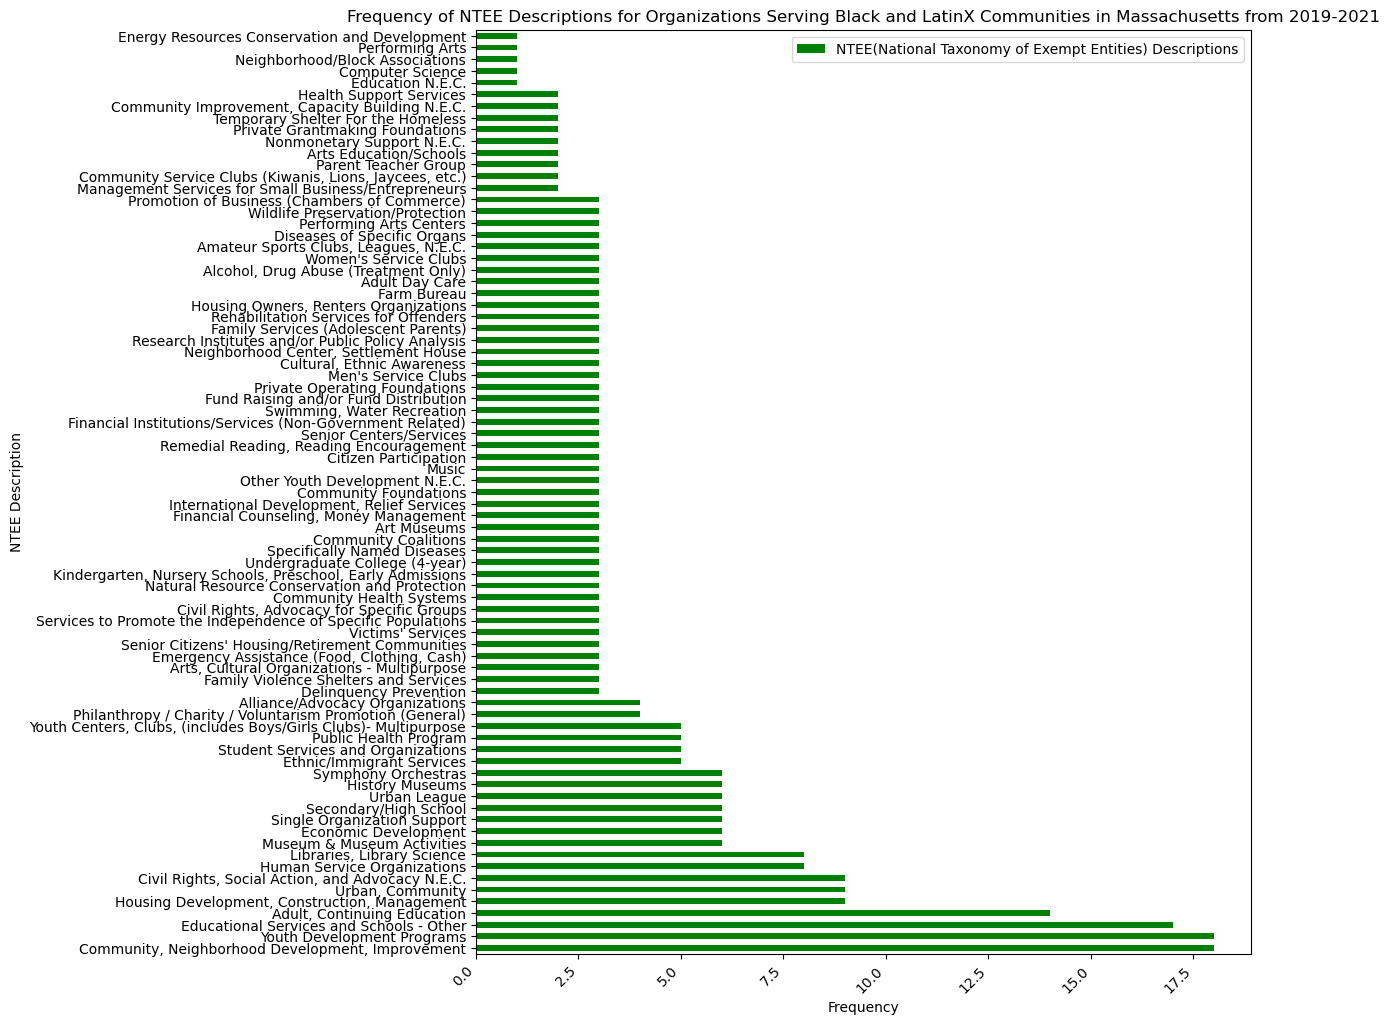

In [2]:
# Read the base bundle and grant files
base_bundle = pd.read_csv('Base_bundle.csv', low_memory=False)
grants = pd.read_csv('Grants.csv', low_memory=False)

african_descent_code = 'PE030000'
latin_american_descent_code = 'PE050000'

# Filtering organizations serving Black and LatinX communities in Massachusetts
ma_orgs = base_bundle[(base_bundle['state_code'] == 'MA') & (base_bundle['pcs_population'].str.contains(african_descent_code) | base_bundle['pcs_population'].str.contains(latin_american_descent_code))]

# Filter organizations with "active" status
ma_orgs = ma_orgs[ma_orgs['active_status'] == 'Active']

# Filter grants for organizations serving Black and LatinX communities in Massachusetts
ma_grants = grants[grants['gm_state'] == 'MA']

# Further filter grants for Black and LatinX communities
black_latinx_grants = ma_grants[(ma_grants['recip_population_code'].str.contains(african_descent_code)) | 
                                 (ma_grants['recip_population_code'].str.contains(latin_american_descent_code))]


# Analyze the missions of the nonprofits using the ntee_description column
mission_counts_orgs = ma_orgs['ntee_description'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 12))
mission_counts_orgs.plot(kind='barh', color='green')
plt.title('Frequency of NTEE Descriptions for Organizations Serving Black and LatinX Communities in Massachusetts from 2019-2021')
plt.xlabel('Frequency')
plt.ylabel('NTEE Description')
plt.xticks(rotation=45, ha='right')

# Show the key
plt.legend(['NTEE(National Taxonomy of Exempt Entities) Descriptions'])

plt.show()

In [3]:
# Count the occurrences of each organization name
orgs_ntee_df['name_count'] = orgs_ntee_df.groupby('ntee_descriptions')['ntee_descriptions'].transform('count')

# Drop duplicates to keep only unique organization names
unique_orgs_ntee_df = orgs_ntee_df.drop_duplicates(subset='ntee_descriptions')

# Display data as a table grid
print(unique_orgs_ntee_df.to_string()) 

NameError: name 'orgs_ntee_df' is not defined

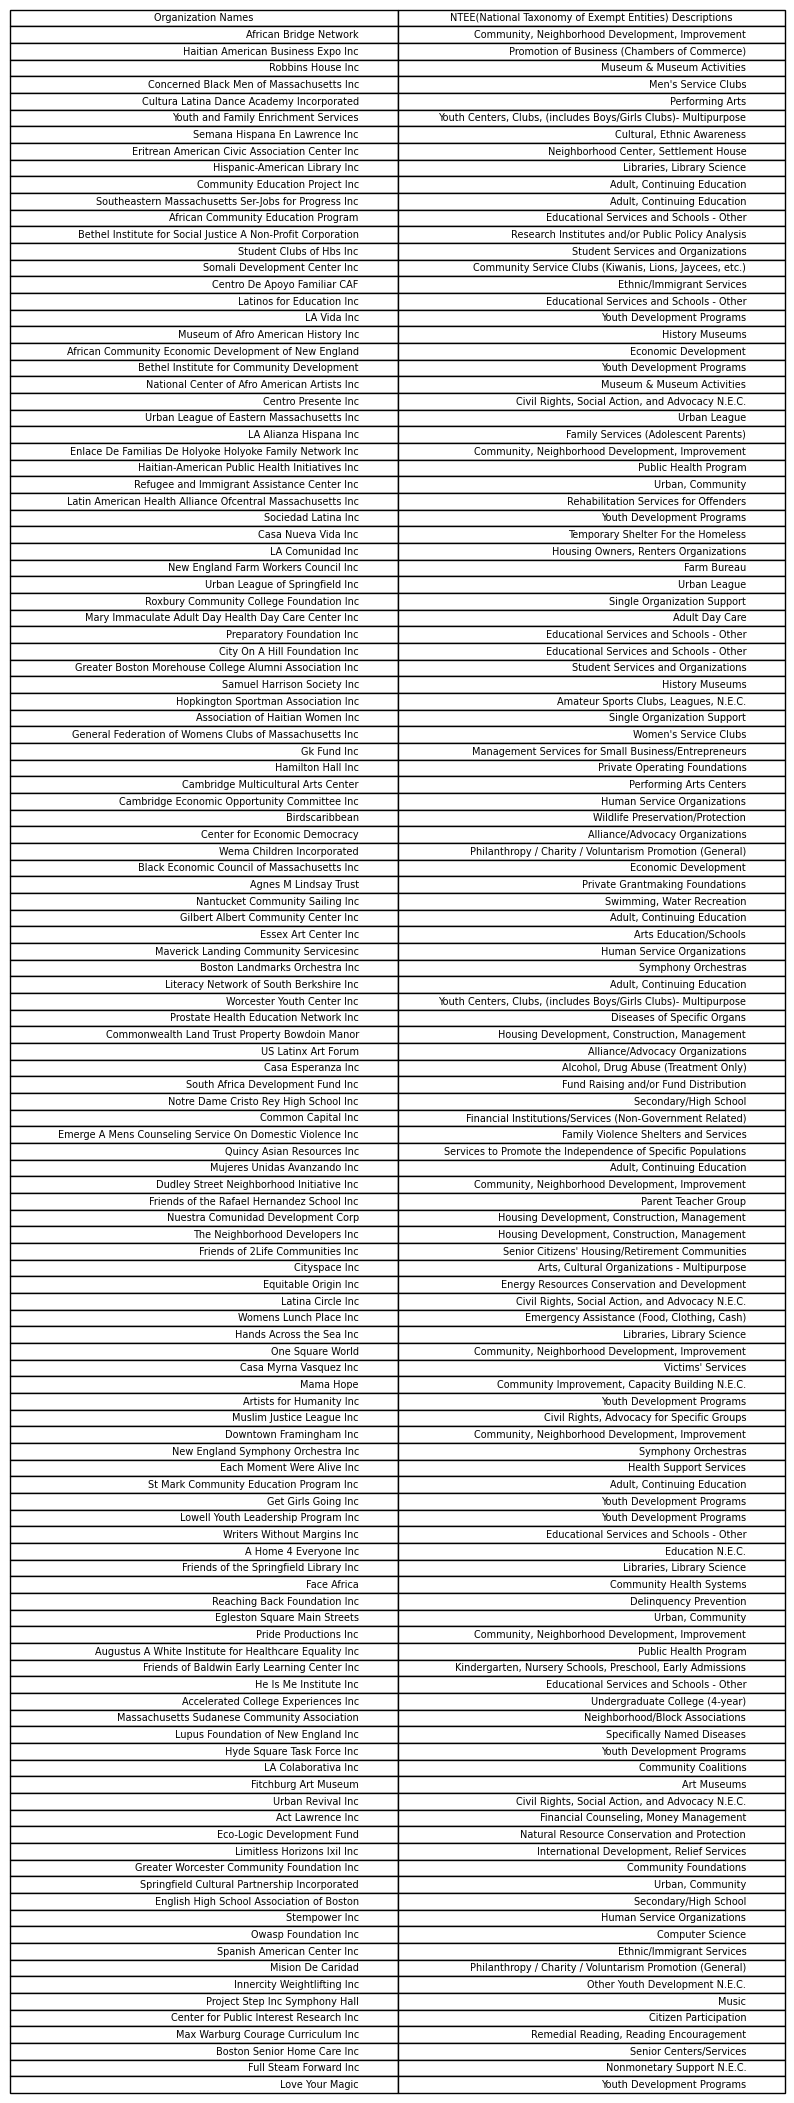

In [ ]:
# Create a DataFrame with unique organization names and their respective NTEE descriptions
orgs_ntee_df = pd.DataFrame({'Organization Names': ma_orgs['organization_name'].drop_duplicates(),
                             'NTEE(National Taxonomy of Exempt Entities) Descriptions': ma_orgs.drop_duplicates(subset='organization_name')['ntee_description']})

# Display data as a table chart grid
plt.figure(figsize=(10, 6))
plt.table(cellText=orgs_ntee_df.values, 
          colLabels=orgs_ntee_df.columns, 
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()

grant_transaction_tran
grant_population_tran
grant_subject_tran
description
payment_status
amount_usd
fiscal_year
recipient_organization_status
recip_population_tran
recip_name
gm_organization_tran
gm_name - good

2015-2021

NTEE definitiion"Alright, imagine you have a huge box of LEGO pieces, and you want to organize them into different categories like cars, buildings, or animals. The National Taxonomy of Exempt Entities (NTEE) is kind of like that, but instead of LEGO pieces, it's for organizing different types of organizations that don't have to pay taxes, like charities or nonprofit groups.

Just like how you'd sort LEGO pieces into categories based on what they look like or what they do, the NTEE sorts these organizations into categories based on what they do and what their goals are. For example, some might focus on education, others on helping the environment, and so on.

So basically, the NTEE is like a big classification system that helps keep track of all these different tax-exempt organizations and what they're all about. It's like giving each organization its own category or label so we can understand what they do and how they contribute to society."

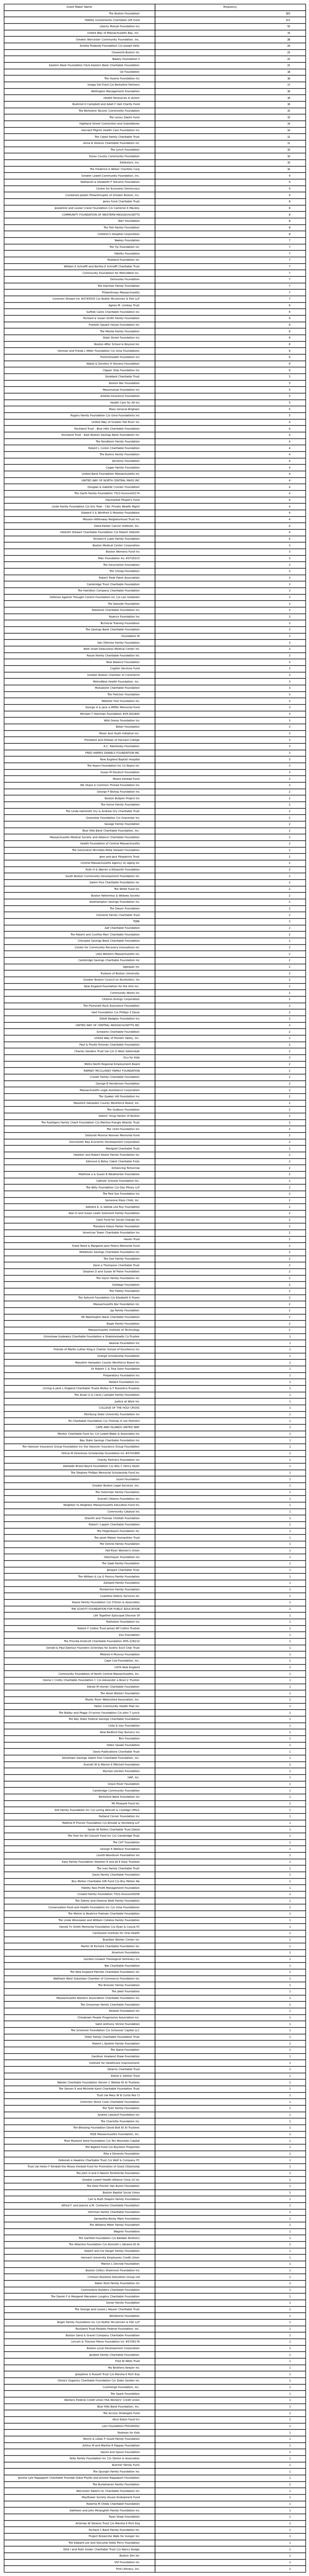

In [ ]:
# Filter grants for paid payments
paid_grants = ma_grants[ma_grants['payment_status'] == 'paid']

# Count the occurrences of each gm_name
gm_name_counts = paid_grants['gm_name'].value_counts()

# Create a DataFrame with the required columns
grants_info_df = pd.DataFrame({
    'Grant Maker Name': gm_name_counts.index,
    'Frequency': gm_name_counts.values
})

# Display data as a table chart grid
plt.figure(figsize=(10, 6))
plt.table(cellText=grants_info_df.values, 
          colLabels=grants_info_df.columns, 
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()


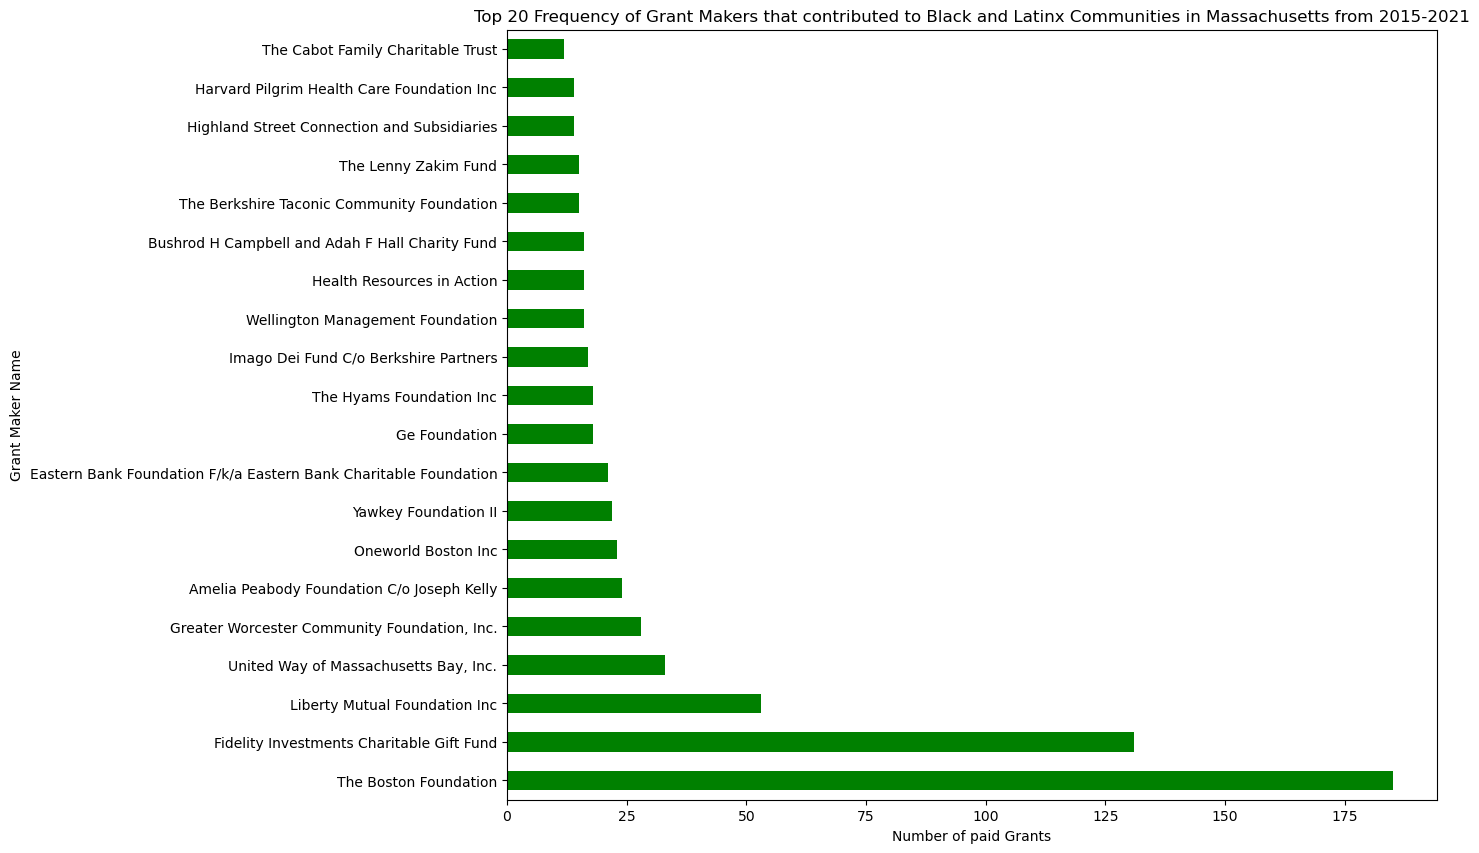

In [ ]:
# Filter grants for paid payments
paid_grants = ma_grants[ma_grants['payment_status'] == 'paid']

# Count the occurrences of each gm_name
gm_name_counts = paid_grants['gm_name'].value_counts().head(20)

# Plot the bar graph
plt.figure(figsize=(12, 10))
gm_name_counts.plot(kind='barh', color='green')  # Horizontal bar graph with gm_names on y-axis
plt.title('Top 20 Frequency of Grant Makers that contributed to Black and Latinx Communities in Massachusetts from 2015-2021')
plt.xlabel('Number of paid Grants')
plt.ylabel('Grant Maker Name')

plt.show()


In [ ]:
# Analyze the issue focus of the grants using the grant_subject_tran column
issue_focus_counts = black_latinx_grants['grant_subject_tran'].value_counts()

# Display the top 10 issue focuses
print("Top 10 Issue Focuses of Grants for Organizations Serving Black and LatinX Communities in Massachusetts:")
print(issue_focus_counts.to_string())

Top 10 Issue Focuses of Grants for Organizations Serving Black and LatinX Communities in Massachusetts:
Education                                                                                                                                                                                                                                                         99
Human services                                                                                                                                                                                                                                                    48
Education; Alzheimer's Disease and other forms of dementia                                                                                                                                                                                                        34
Family services; Child welfare                                                                                   

/var/folders/17/j3m2kzk97j3728_ygs6p6bm80000gn/T/ipykernel_39628/1468239753.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


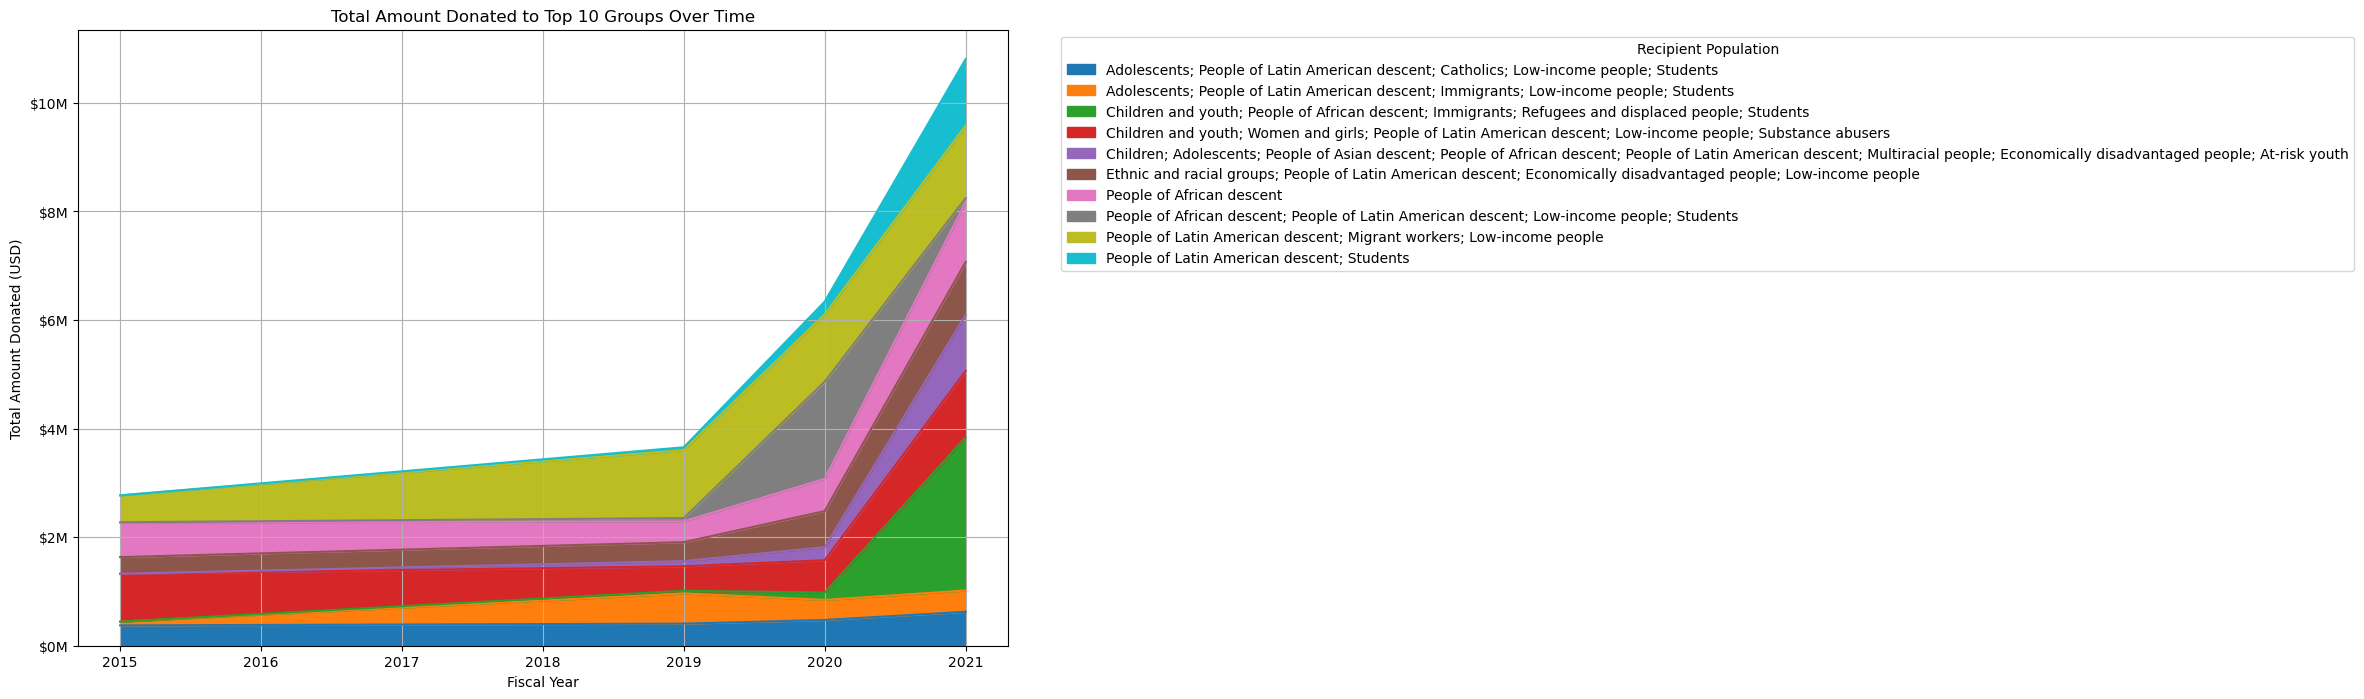

In [ ]:
from matplotlib.ticker import FuncFormatter
# Group data by recipient population type and fiscal year, and calculate total amount donated
grouped_data = black_latinx_grants.groupby(['recip_population_tran', 'fiscal_year'])['amount_usd'].sum().reset_index()

# Sort groups based on total amount donated and get the top 10 groups
top_10_groups = grouped_data.groupby('recip_population_tran')['amount_usd'].sum().nlargest(10).index

# Filter data to include only the top 10 groups
top_10_data = grouped_data[grouped_data['recip_population_tran'].isin(top_10_groups)]

# Create a pivot table to show total amount donated to each group over time
pivot_table = pd.pivot_table(top_10_data, 
                             values='amount_usd', 
                             index='fiscal_year', 
                             columns='recip_population_tran', 
                             aggfunc='sum', 
                             fill_value=0)

# Plotting a stacked area plot
fig, ax = plt.subplots(figsize=(12, 8))
pivot_table.plot(kind='area', stacked=True, ax=ax)

# Formatting Y-axis labels to display values in millions
def millions_formatter(x, pos):
    return '${:.0f}M'.format(x * 1e-6)

formatter = FuncFormatter(millions_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.title('Total Amount Donated to Top 10 Groups Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Amount Donated (USD)')
plt.grid(True)
plt.legend(title='Recipient Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

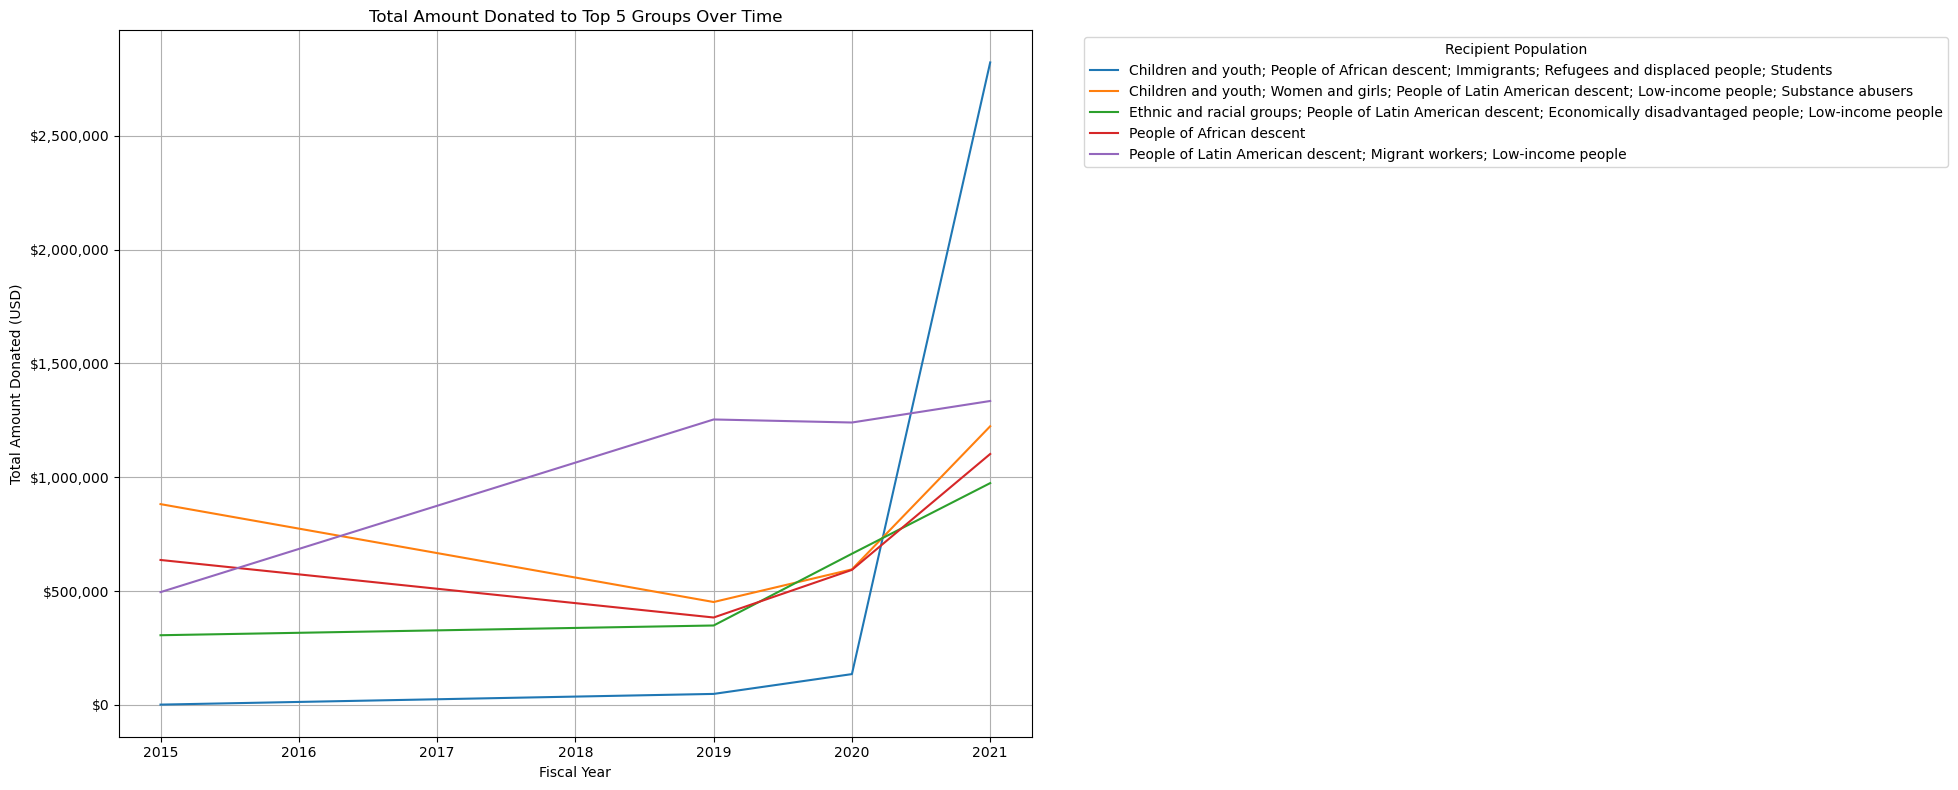

In [9]:
# Group data by recipient population type and fiscal year, and calculate total amount donated
grouped_data = black_latinx_grants.groupby(['recip_population_tran', 'fiscal_year'])['amount_usd'].sum().reset_index()

# Sort groups based on total amount donated and get the top 5 groups
top_5_groups = grouped_data.groupby('recip_population_tran')['amount_usd'].sum().nlargest(5).index

# Filter data to include only the top 5 groups
top_5_data = grouped_data[grouped_data['recip_population_tran'].isin(top_5_groups)]

# Create a pivot table to show total amount donated to each group over time
pivot_table = pd.pivot_table(top_5_data, 
                             values='amount_usd', 
                             index='fiscal_year', 
                             columns='recip_population_tran', 
                             aggfunc='sum', 
                             fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

for column in pivot_table.columns:
    ax.plot(pivot_table.index, pivot_table[column], label=column)

# Formatting Y-axis labels to display values in millions
ax.yaxis.set_major_formatter('${x:,.0f}')

plt.title('Total Amount Donated to Top 5 Groups Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Amount Donated (USD)')
plt.grid(True)
plt.legend(title='Recipient Population', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

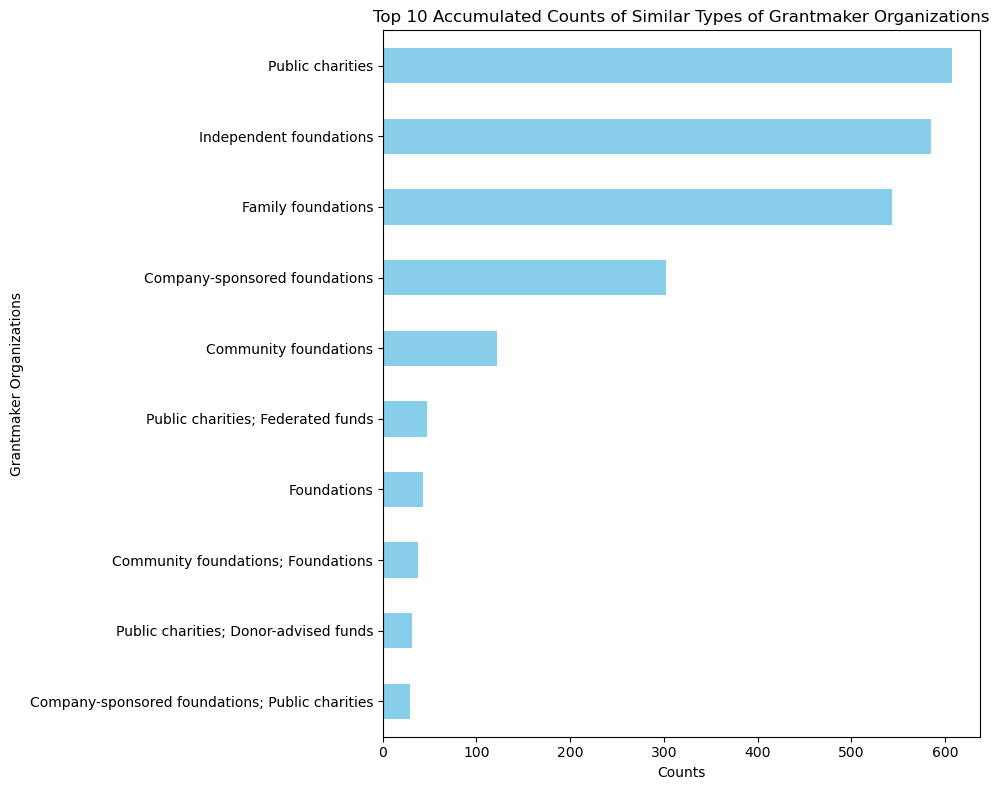

In [16]:
# Group similar types of grantmaker organizations and accumulate their counts
org_type_counts = grants['gm_organization_tran'].value_counts()

# Get the top 10 accumulated counts
top_10_org_types = org_type_counts.head(10)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 8))
top_10_org_types.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Accumulated Counts of Similar Types of Grantmaker Organizations')
plt.xlabel('Counts')
plt.ylabel('Grantmaker Organizations')
plt.tight_layout()
plt.show()

Use Grant data and Base bundle gm_name to see what organization are helping out black and latinx communities. 

subsection_code,subsection_code_description dive deeper into this too.

Charles Mid-semester report

"""How much funding is going toward racial justice programs
(based on donations to nonprofits that focus on these issues) 
in Massachusetts and how has this shifted over time?"""

/var/folders/17/j3m2kzk97j3728_ygs6p6bm80000gn/T/ipykernel_38919/2651578179.py:6: DtypeWarning: Columns (4,5,12,16,18,21,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_base_bundle = pd.read_csv("Base_bundle.csv")


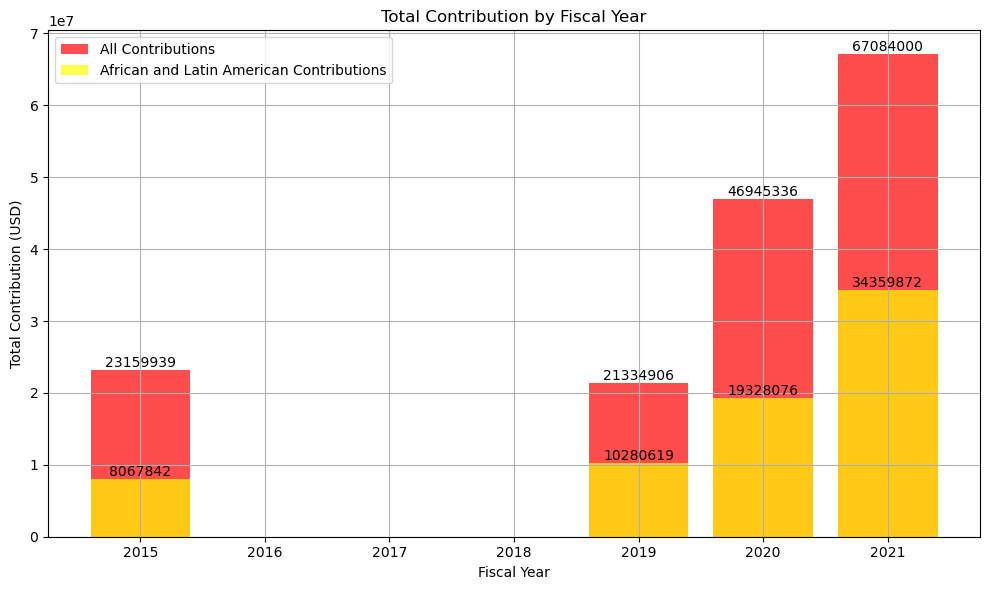

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
grant_df = pd.read_csv("Grants.csv")
df_base_bundle = pd.read_csv("Base_bundle.csv")
grant_df.head()

african_code = 'PE030000'
latin_american_code = 'PE050000'

filtered_df = df_base_bundle[df_base_bundle['pcs_population'].str.contains(african_code) | df_base_bundle['pcs_population'].str.contains(latin_american_code)]
filtered_grants_df = grant_df[grant_df['recip_population_code'].str.contains(african_code) | grant_df['recip_population_code'].str.contains(latin_american_code)]

# finding the comparison for amount of grants towards african/latinx vs total contributions
total_amount_by_year = grant_df.groupby('fiscal_year')['amount_usd'].sum()
yearly_contrib = filtered_grants_df.groupby('fiscal_year')['amount_usd'].sum()

# Plotting the graph of the amounts
plt.figure(figsize=(10, 6))
plt.bar(total_amount_by_year.index, total_amount_by_year.values, label='All Contributions', color='red', alpha=0.7)
plt.bar(yearly_contrib.index, yearly_contrib.values, label='African and Latin American Contributions', color='yellow', alpha=0.7)

for i, txt in enumerate(total_amount_by_year.values):
    plt.text(total_amount_by_year.index[i], txt, f'{txt:.0f}', ha='center', va='bottom')

for i, txt in enumerate(yearly_contrib.values):
    plt.text(yearly_contrib.index[i], txt, f'{txt:.0f}', ha='center', va='bottom')

plt.xlabel('Fiscal Year')
plt.ylabel('Total Contribution (USD)')
plt.title('Total Contribution by Fiscal Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()